In [1]:
%pip install torchmetrics
%pip install segmentation-models-pytorch
%pip install lightning
%pip install -U albumentations
%pip install rasterio matplotlib
%pip install -U segmentation-models-pytorch

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import torch
import torch.nn as nn

In [38]:
from dataloader import SegmentationDataset, get_all_file_paths, transform
from torch.utils.data import DataLoader

# Paths to training and validation images and labels
train_image_paths = get_all_file_paths('6BandDataset/train/6chnl')
train_label_paths = get_all_file_paths('6BandDataset/train/label')
val_image_paths = get_all_file_paths('6BandDataset/val/6chnl')
val_label_paths = get_all_file_paths('6BandDataset/val/label')
test_image_paths = get_all_file_paths('6BandDataset/test/6chnl')
test_label_paths = get_all_file_paths('6BandDataset/test/label')

# Datasets and DataLoaders
train_dataset = SegmentationDataset(train_image_paths, train_label_paths, transform)
val_dataset = SegmentationDataset(val_image_paths, val_label_paths, transform)
test_dataset = SegmentationDataset(test_image_paths, test_label_paths, transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)



In [39]:
from model_selection import model_unetPlusPlus
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model_deepLabV3 = CustomDeepLabV3(num_classes=14).to(device)

# Define loss function and optimizer
# loss_fn = torch.nn.CrossEntropyLoss()

# # Optimizer
# initial_lr = 0.001
# optimizer = optim.Adam(model_unetPlusPlus.parameters(), lr=initial_lr)

# # Learning rate scheduler
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=18, verbose=True)

## To train with Unet++ :
from model_selection import model_unetPlusPlus
loss_fn = nn.CrossEntropyLoss()
optimizer= optim.Adam(model_unetPlusPlus.parameters(), lr=1e-3)


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
from train import train

train(model=model_unetPlusPlus, 
      train_loader=train_loader, 
      val_loader=val_loader, 
      loss_fn=loss_fn, 
      optimizer=optimizer,
      num_epochs=72,
      num_classes=14)


  0%|          | 0/48 [00:00<?, ?it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\Asus\OneDrive\Desktop\Personal\My Projects\Satellite_img_dl\dataloader.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
100%|██████████| 11/11 [00:02<00:00,  4.04it/s]


Epoch [1/72], Val Loss: 1.0678, Val Accuracy: 0.64%, Val Precision: 0.6287, Val F1: 0.5902, Val Recall: 0.6365, Val IoU: 0.4568


100%|██████████| 11/11 [00:02<00:00,  4.02it/s]


Epoch [2/72], Val Loss: 1.7663, Val Accuracy: 0.48%, Val Precision: 0.5662, Val F1: 0.4255, Val Recall: 0.4794, Val IoU: 0.2965


100%|██████████| 11/11 [00:02<00:00,  4.18it/s]


Epoch [3/72], Val Loss: 0.9710, Val Accuracy: 0.67%, Val Precision: 0.6506, Val F1: 0.6285, Val Recall: 0.6715, Val IoU: 0.5046


100%|██████████| 11/11 [00:02<00:00,  4.04it/s]


Epoch [4/72], Val Loss: 0.8701, Val Accuracy: 0.69%, Val Precision: 0.6799, Val F1: 0.6582, Val Recall: 0.6948, Val IoU: 0.5302


100%|██████████| 11/11 [00:02<00:00,  4.11it/s]


Epoch [5/72], Val Loss: 0.8144, Val Accuracy: 0.71%, Val Precision: 0.6978, Val F1: 0.6870, Val Recall: 0.7138, Val IoU: 0.5592


100%|██████████| 11/11 [00:02<00:00,  3.96it/s]


Epoch [6/72], Val Loss: 0.8604, Val Accuracy: 0.70%, Val Precision: 0.6930, Val F1: 0.6710, Val Recall: 0.7012, Val IoU: 0.5431


100%|██████████| 11/11 [00:02<00:00,  4.00it/s]


Epoch [7/72], Val Loss: 0.8465, Val Accuracy: 0.71%, Val Precision: 0.6930, Val F1: 0.6828, Val Recall: 0.7103, Val IoU: 0.5519


100%|██████████| 11/11 [00:02<00:00,  4.07it/s]


Epoch [8/72], Val Loss: 0.7935, Val Accuracy: 0.72%, Val Precision: 0.7133, Val F1: 0.6991, Val Recall: 0.7175, Val IoU: 0.5701


100%|██████████| 11/11 [00:02<00:00,  4.09it/s]


Epoch [9/72], Val Loss: 0.7234, Val Accuracy: 0.74%, Val Precision: 0.7271, Val F1: 0.7236, Val Recall: 0.7413, Val IoU: 0.5977


100%|██████████| 11/11 [00:02<00:00,  4.20it/s]


Epoch [10/72], Val Loss: 1.2144, Val Accuracy: 0.64%, Val Precision: 0.6578, Val F1: 0.6343, Val Recall: 0.6399, Val IoU: 0.4871


100%|██████████| 11/11 [00:02<00:00,  4.09it/s]


Epoch [11/72], Val Loss: 1.4719, Val Accuracy: 0.48%, Val Precision: 0.6147, Val F1: 0.4978, Val Recall: 0.4836, Val IoU: 0.3645


100%|██████████| 11/11 [00:02<00:00,  4.20it/s]


Epoch [12/72], Val Loss: 0.7044, Val Accuracy: 0.75%, Val Precision: 0.7320, Val F1: 0.7165, Val Recall: 0.7462, Val IoU: 0.5953


100%|██████████| 11/11 [00:02<00:00,  4.33it/s]


Epoch [13/72], Val Loss: 0.7501, Val Accuracy: 0.74%, Val Precision: 0.7383, Val F1: 0.7177, Val Recall: 0.7400, Val IoU: 0.5907


100%|██████████| 11/11 [00:02<00:00,  4.22it/s]


Epoch [14/72], Val Loss: 0.6721, Val Accuracy: 0.75%, Val Precision: 0.7435, Val F1: 0.7420, Val Recall: 0.7550, Val IoU: 0.6167


100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


Epoch [15/72], Val Loss: 0.6622, Val Accuracy: 0.75%, Val Precision: 0.7585, Val F1: 0.7496, Val Recall: 0.7534, Val IoU: 0.6202


100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


Epoch [16/72], Val Loss: 0.5812, Val Accuracy: 0.78%, Val Precision: 0.7742, Val F1: 0.7739, Val Recall: 0.7830, Val IoU: 0.6551


100%|██████████| 11/11 [00:03<00:00,  3.63it/s]


Epoch [17/72], Val Loss: 0.5783, Val Accuracy: 0.78%, Val Precision: 0.7812, Val F1: 0.7784, Val Recall: 0.7841, Val IoU: 0.6577


100%|██████████| 11/11 [00:02<00:00,  4.29it/s]


Epoch [18/72], Val Loss: 0.5680, Val Accuracy: 0.79%, Val Precision: 0.7811, Val F1: 0.7808, Val Recall: 0.7887, Val IoU: 0.6628


100%|██████████| 11/11 [00:02<00:00,  4.19it/s]


Epoch [19/72], Val Loss: 0.5664, Val Accuracy: 0.79%, Val Precision: 0.7862, Val F1: 0.7827, Val Recall: 0.7902, Val IoU: 0.6640


100%|██████████| 11/11 [00:02<00:00,  4.41it/s]


Epoch [20/72], Val Loss: 0.5386, Val Accuracy: 0.80%, Val Precision: 0.7949, Val F1: 0.7950, Val Recall: 0.7981, Val IoU: 0.6776


100%|██████████| 11/11 [00:02<00:00,  4.39it/s]


Epoch [21/72], Val Loss: 0.5353, Val Accuracy: 0.80%, Val Precision: 0.8094, Val F1: 0.7998, Val Recall: 0.7988, Val IoU: 0.6820


100%|██████████| 11/11 [00:02<00:00,  4.33it/s]


Epoch [22/72], Val Loss: 0.5176, Val Accuracy: 0.81%, Val Precision: 0.8119, Val F1: 0.8061, Val Recall: 0.8065, Val IoU: 0.6896


100%|██████████| 11/11 [00:02<00:00,  4.55it/s]


Epoch [23/72], Val Loss: 0.4959, Val Accuracy: 0.82%, Val Precision: 0.8230, Val F1: 0.8182, Val Recall: 0.8177, Val IoU: 0.7067


100%|██████████| 11/11 [00:02<00:00,  4.52it/s]


Epoch [24/72], Val Loss: 0.5107, Val Accuracy: 0.81%, Val Precision: 0.8165, Val F1: 0.8124, Val Recall: 0.8130, Val IoU: 0.6977


100%|██████████| 11/11 [00:02<00:00,  4.40it/s]


Epoch [25/72], Val Loss: 0.6119, Val Accuracy: 0.78%, Val Precision: 0.8004, Val F1: 0.7836, Val Recall: 0.7837, Val IoU: 0.6573


100%|██████████| 11/11 [00:02<00:00,  4.28it/s]


Epoch [26/72], Val Loss: 0.4745, Val Accuracy: 0.83%, Val Precision: 0.8276, Val F1: 0.8262, Val Recall: 0.8277, Val IoU: 0.7171


100%|██████████| 11/11 [00:02<00:00,  4.37it/s]


Epoch [27/72], Val Loss: 0.4592, Val Accuracy: 0.83%, Val Precision: 0.8346, Val F1: 0.8332, Val Recall: 0.8338, Val IoU: 0.7255


100%|██████████| 11/11 [00:02<00:00,  4.28it/s]


Epoch [28/72], Val Loss: 0.4544, Val Accuracy: 0.83%, Val Precision: 0.8450, Val F1: 0.8350, Val Recall: 0.8336, Val IoU: 0.7279


100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


Epoch [29/72], Val Loss: 4.3943, Val Accuracy: 0.36%, Val Precision: 0.5272, Val F1: 0.3034, Val Recall: 0.3570, Val IoU: 0.2080


100%|██████████| 11/11 [00:02<00:00,  4.37it/s]


Epoch [30/72], Val Loss: 0.9626, Val Accuracy: 0.66%, Val Precision: 0.7075, Val F1: 0.6721, Val Recall: 0.6601, Val IoU: 0.5233


100%|██████████| 11/11 [00:02<00:00,  4.29it/s]


Epoch [31/72], Val Loss: 0.5911, Val Accuracy: 0.79%, Val Precision: 0.7886, Val F1: 0.7834, Val Recall: 0.7862, Val IoU: 0.6613


100%|██████████| 11/11 [00:02<00:00,  4.24it/s]


Epoch [32/72], Val Loss: 0.5480, Val Accuracy: 0.81%, Val Precision: 0.8070, Val F1: 0.8027, Val Recall: 0.8078, Val IoU: 0.6845


100%|██████████| 11/11 [00:02<00:00,  4.18it/s]


Epoch [33/72], Val Loss: 0.4772, Val Accuracy: 0.83%, Val Precision: 0.8324, Val F1: 0.8286, Val Recall: 0.8298, Val IoU: 0.7200


100%|██████████| 11/11 [00:02<00:00,  3.72it/s]


Epoch [34/72], Val Loss: 0.4421, Val Accuracy: 0.84%, Val Precision: 0.8417, Val F1: 0.8400, Val Recall: 0.8405, Val IoU: 0.7352


100%|██████████| 11/11 [00:02<00:00,  4.07it/s]


Epoch [35/72], Val Loss: 0.4257, Val Accuracy: 0.85%, Val Precision: 0.8496, Val F1: 0.8467, Val Recall: 0.8480, Val IoU: 0.7446


100%|██████████| 11/11 [00:02<00:00,  4.09it/s]


Epoch [36/72], Val Loss: 0.4145, Val Accuracy: 0.85%, Val Precision: 0.8553, Val F1: 0.8534, Val Recall: 0.8534, Val IoU: 0.7540


100%|██████████| 11/11 [00:02<00:00,  4.05it/s]


Epoch [37/72], Val Loss: 0.4213, Val Accuracy: 0.86%, Val Precision: 0.8567, Val F1: 0.8543, Val Recall: 0.8563, Val IoU: 0.7559


100%|██████████| 11/11 [00:02<00:00,  3.97it/s]


Epoch [38/72], Val Loss: 0.4244, Val Accuracy: 0.85%, Val Precision: 0.8557, Val F1: 0.8534, Val Recall: 0.8542, Val IoU: 0.7533


100%|██████████| 11/11 [00:02<00:00,  4.16it/s]


Epoch [39/72], Val Loss: 0.3919, Val Accuracy: 0.87%, Val Precision: 0.8682, Val F1: 0.8659, Val Recall: 0.8667, Val IoU: 0.7724


100%|██████████| 11/11 [00:02<00:00,  4.05it/s]


Epoch [40/72], Val Loss: 0.3766, Val Accuracy: 0.87%, Val Precision: 0.8734, Val F1: 0.8713, Val Recall: 0.8717, Val IoU: 0.7801


100%|██████████| 11/11 [00:02<00:00,  4.41it/s]


Epoch [41/72], Val Loss: 0.4061, Val Accuracy: 0.86%, Val Precision: 0.8697, Val F1: 0.8646, Val Recall: 0.8644, Val IoU: 0.7701


100%|██████████| 11/11 [00:02<00:00,  4.25it/s]


Epoch [42/72], Val Loss: 0.4053, Val Accuracy: 0.86%, Val Precision: 0.8652, Val F1: 0.8626, Val Recall: 0.8635, Val IoU: 0.7665


100%|██████████| 11/11 [00:02<00:00,  4.27it/s]


Epoch [43/72], Val Loss: 0.4296, Val Accuracy: 0.85%, Val Precision: 0.8596, Val F1: 0.8543, Val Recall: 0.8549, Val IoU: 0.7537


100%|██████████| 11/11 [00:02<00:00,  4.22it/s]


Epoch [44/72], Val Loss: 0.3763, Val Accuracy: 0.88%, Val Precision: 0.8768, Val F1: 0.8751, Val Recall: 0.8768, Val IoU: 0.7857


100%|██████████| 11/11 [00:02<00:00,  4.35it/s]


Epoch [45/72], Val Loss: 0.3770, Val Accuracy: 0.88%, Val Precision: 0.8786, Val F1: 0.8761, Val Recall: 0.8776, Val IoU: 0.7870


100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


Epoch [46/72], Val Loss: 0.3763, Val Accuracy: 0.88%, Val Precision: 0.8808, Val F1: 0.8767, Val Recall: 0.8771, Val IoU: 0.7881


100%|██████████| 11/11 [00:02<00:00,  4.23it/s]


Epoch [47/72], Val Loss: 0.3428, Val Accuracy: 0.89%, Val Precision: 0.8891, Val F1: 0.8882, Val Recall: 0.8891, Val IoU: 0.8057


100%|██████████| 11/11 [00:02<00:00,  4.19it/s]


Epoch [48/72], Val Loss: 0.3545, Val Accuracy: 0.89%, Val Precision: 0.8861, Val F1: 0.8848, Val Recall: 0.8853, Val IoU: 0.8001


100%|██████████| 11/11 [00:02<00:00,  4.41it/s]


Epoch [49/72], Val Loss: 0.3876, Val Accuracy: 0.88%, Val Precision: 0.8800, Val F1: 0.8780, Val Recall: 0.8794, Val IoU: 0.7898


100%|██████████| 11/11 [00:02<00:00,  4.35it/s]


Epoch [50/72], Val Loss: 0.3969, Val Accuracy: 0.87%, Val Precision: 0.8766, Val F1: 0.8735, Val Recall: 0.8748, Val IoU: 0.7825


100%|██████████| 11/11 [00:02<00:00,  4.33it/s]


Epoch [51/72], Val Loss: 0.3504, Val Accuracy: 0.89%, Val Precision: 0.8898, Val F1: 0.8885, Val Recall: 0.8896, Val IoU: 0.8058


100%|██████████| 11/11 [00:02<00:00,  4.40it/s]


Epoch [52/72], Val Loss: 0.3714, Val Accuracy: 0.88%, Val Precision: 0.8857, Val F1: 0.8832, Val Recall: 0.8842, Val IoU: 0.7979


100%|██████████| 11/11 [00:02<00:00,  4.44it/s]


Epoch [53/72], Val Loss: 0.3278, Val Accuracy: 0.90%, Val Precision: 0.8967, Val F1: 0.8954, Val Recall: 0.8960, Val IoU: 0.8168


100%|██████████| 11/11 [00:02<00:00,  3.99it/s]


Epoch [54/72], Val Loss: 0.3420, Val Accuracy: 0.89%, Val Precision: 0.8918, Val F1: 0.8908, Val Recall: 0.8917, Val IoU: 0.8096


100%|██████████| 11/11 [00:02<00:00,  4.36it/s]


Epoch [55/72], Val Loss: 0.3299, Val Accuracy: 0.90%, Val Precision: 0.8987, Val F1: 0.8973, Val Recall: 0.8979, Val IoU: 0.8197


100%|██████████| 11/11 [00:02<00:00,  4.20it/s]


Epoch [56/72], Val Loss: 0.3292, Val Accuracy: 0.90%, Val Precision: 0.9000, Val F1: 0.8986, Val Recall: 0.9000, Val IoU: 0.8220


100%|██████████| 11/11 [00:02<00:00,  4.33it/s]


Epoch [57/72], Val Loss: 0.3370, Val Accuracy: 0.90%, Val Precision: 0.8986, Val F1: 0.8964, Val Recall: 0.8973, Val IoU: 0.8184


100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


Epoch [58/72], Val Loss: 0.3280, Val Accuracy: 0.90%, Val Precision: 0.9004, Val F1: 0.8993, Val Recall: 0.8998, Val IoU: 0.8228


100%|██████████| 11/11 [00:02<00:00,  4.34it/s]


Epoch [59/72], Val Loss: 0.3358, Val Accuracy: 0.90%, Val Precision: 0.9002, Val F1: 0.8989, Val Recall: 0.8997, Val IoU: 0.8221


100%|██████████| 11/11 [00:02<00:00,  4.33it/s]


Epoch [60/72], Val Loss: 0.3212, Val Accuracy: 0.90%, Val Precision: 0.9047, Val F1: 0.9033, Val Recall: 0.9039, Val IoU: 0.8293


100%|██████████| 11/11 [00:02<00:00,  4.22it/s]


Epoch [61/72], Val Loss: 0.3454, Val Accuracy: 0.90%, Val Precision: 0.8997, Val F1: 0.8974, Val Recall: 0.8979, Val IoU: 0.8199


100%|██████████| 11/11 [00:02<00:00,  4.31it/s]


Epoch [62/72], Val Loss: 0.3177, Val Accuracy: 0.91%, Val Precision: 0.9084, Val F1: 0.9073, Val Recall: 0.9081, Val IoU: 0.8358


100%|██████████| 11/11 [00:02<00:00,  4.38it/s]


Epoch [63/72], Val Loss: 0.3596, Val Accuracy: 0.90%, Val Precision: 0.8998, Val F1: 0.8985, Val Recall: 0.8998, Val IoU: 0.8218


100%|██████████| 11/11 [00:02<00:00,  4.44it/s]


Epoch [64/72], Val Loss: 0.3330, Val Accuracy: 0.90%, Val Precision: 0.9019, Val F1: 0.9006, Val Recall: 0.9009, Val IoU: 0.8245


100%|██████████| 11/11 [00:02<00:00,  4.37it/s]


Epoch [65/72], Val Loss: 0.3227, Val Accuracy: 0.91%, Val Precision: 0.9065, Val F1: 0.9057, Val Recall: 0.9064, Val IoU: 0.8331


100%|██████████| 11/11 [00:02<00:00,  4.07it/s]


Epoch [66/72], Val Loss: 0.3165, Val Accuracy: 0.91%, Val Precision: 0.9083, Val F1: 0.9078, Val Recall: 0.9085, Val IoU: 0.8363


100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


Epoch [67/72], Val Loss: 0.3530, Val Accuracy: 0.90%, Val Precision: 0.9031, Val F1: 0.9004, Val Recall: 0.9017, Val IoU: 0.8248


100%|██████████| 11/11 [00:02<00:00,  4.19it/s]


Epoch [68/72], Val Loss: 1.7852, Val Accuracy: 0.65%, Val Precision: 0.7203, Val F1: 0.6250, Val Recall: 0.6494, Val IoU: 0.4749


100%|██████████| 11/11 [00:02<00:00,  4.39it/s]


Epoch [69/72], Val Loss: 1.0980, Val Accuracy: 0.70%, Val Precision: 0.7379, Val F1: 0.7082, Val Recall: 0.7034, Val IoU: 0.5632


100%|██████████| 11/11 [00:02<00:00,  4.33it/s]


Epoch [70/72], Val Loss: 0.4501, Val Accuracy: 0.86%, Val Precision: 0.8585, Val F1: 0.8532, Val Recall: 0.8554, Val IoU: 0.7528


100%|██████████| 11/11 [00:03<00:00,  3.13it/s]


Epoch [71/72], Val Loss: 0.3355, Val Accuracy: 0.89%, Val Precision: 0.8930, Val F1: 0.8921, Val Recall: 0.8930, Val IoU: 0.8111


100%|██████████| 11/11 [00:02<00:00,  4.03it/s]

Epoch [72/72], Val Loss: 0.3302, Val Accuracy: 0.90%, Val Precision: 0.9022, Val F1: 0.9000, Val Recall: 0.9012, Val IoU: 0.8244
Training completed.


In [43]:
from train import train

train(model=model_unetPlusPlus, 
      train_loader=train_loader, 
      val_loader=val_loader, 
      loss_fn=loss_fn, 
      optimizer=optimizer,
      num_epochs=8,
      num_classes=14)


100%|██████████| 11/11 [00:02<00:00,  4.16it/s]


Epoch [1/8], Val Loss: 0.3084, Val Accuracy: 0.91%, Val Precision: 0.9103, Val F1: 0.9094, Val Recall: 0.9105, Val IoU: 0.8392


100%|██████████| 11/11 [00:02<00:00,  4.24it/s]


Epoch [2/8], Val Loss: 0.3028, Val Accuracy: 0.91%, Val Precision: 0.9113, Val F1: 0.9104, Val Recall: 0.9112, Val IoU: 0.8405


100%|██████████| 11/11 [00:02<00:00,  4.24it/s]


Epoch [3/8], Val Loss: 0.3019, Val Accuracy: 0.91%, Val Precision: 0.9145, Val F1: 0.9129, Val Recall: 0.9137, Val IoU: 0.8447


100%|██████████| 11/11 [00:02<00:00,  4.25it/s]


Epoch [4/8], Val Loss: 0.3009, Val Accuracy: 0.92%, Val Precision: 0.9164, Val F1: 0.9154, Val Recall: 0.9163, Val IoU: 0.8489


100%|██████████| 11/11 [00:02<00:00,  4.20it/s]


Epoch [5/8], Val Loss: 0.3086, Val Accuracy: 0.91%, Val Precision: 0.9145, Val F1: 0.9133, Val Recall: 0.9140, Val IoU: 0.8455


100%|██████████| 11/11 [00:02<00:00,  4.36it/s]


Epoch [6/8], Val Loss: 0.3045, Val Accuracy: 0.92%, Val Precision: 0.9176, Val F1: 0.9166, Val Recall: 0.9175, Val IoU: 0.8509


100%|██████████| 11/11 [00:02<00:00,  4.09it/s]


Epoch [7/8], Val Loss: 0.2945, Val Accuracy: 0.92%, Val Precision: 0.9207, Val F1: 0.9196, Val Recall: 0.9202, Val IoU: 0.8559


100%|██████████| 11/11 [00:02<00:00,  4.29it/s]

Epoch [8/8], Val Loss: 0.3649, Val Accuracy: 0.91%, Val Precision: 0.9079, Val F1: 0.9046, Val Recall: 0.9055, Val IoU: 0.8312
Training completed.


In [47]:
from train import train

train(model=model_unetPlusPlus, 
      train_loader=train_loader, 
      val_loader=val_loader, 
      loss_fn=loss_fn, 
      optimizer=optimizer,
      num_epochs=11,
      num_classes=14)


  0%|          | 0/48 [00:00<?, ?it/s]c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\Asus\OneDrive\Desktop\Personal\My Projects\Satellite_img_dl\dataloader.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
100%|██████████| 11/11 [00:02<00:00,  4.27it/s]


Epoch [1/11], Val Loss: 0.3244, Val Accuracy: 0.91%, Val Precision: 0.9155, Val F1: 0.9134, Val Recall: 0.9147, Val IoU: 0.8459


100%|██████████| 11/11 [00:02<00:00,  4.24it/s]


Epoch [2/11], Val Loss: 0.3068, Val Accuracy: 0.92%, Val Precision: 0.9176, Val F1: 0.9168, Val Recall: 0.9176, Val IoU: 0.8512


100%|██████████| 11/11 [00:02<00:00,  4.20it/s]


Epoch [3/11], Val Loss: 0.3026, Val Accuracy: 0.92%, Val Precision: 0.9209, Val F1: 0.9195, Val Recall: 0.9201, Val IoU: 0.8559


100%|██████████| 11/11 [00:02<00:00,  4.21it/s]


Epoch [4/11], Val Loss: 0.3054, Val Accuracy: 0.92%, Val Precision: 0.9211, Val F1: 0.9201, Val Recall: 0.9208, Val IoU: 0.8568


100%|██████████| 11/11 [00:02<00:00,  3.67it/s]


Epoch [5/11], Val Loss: 0.3281, Val Accuracy: 0.91%, Val Precision: 0.9150, Val F1: 0.9130, Val Recall: 0.9136, Val IoU: 0.8445


100%|██████████| 11/11 [00:02<00:00,  4.13it/s]


Epoch [6/11], Val Loss: 0.3924, Val Accuracy: 0.90%, Val Precision: 0.9029, Val F1: 0.8980, Val Recall: 0.8976, Val IoU: 0.8195


100%|██████████| 11/11 [00:02<00:00,  4.34it/s]


Epoch [7/11], Val Loss: 0.3003, Val Accuracy: 0.92%, Val Precision: 0.9191, Val F1: 0.9177, Val Recall: 0.9184, Val IoU: 0.8527


100%|██████████| 11/11 [00:02<00:00,  4.36it/s]


Epoch [8/11], Val Loss: 0.3119, Val Accuracy: 0.92%, Val Precision: 0.9174, Val F1: 0.9160, Val Recall: 0.9166, Val IoU: 0.8498


100%|██████████| 11/11 [00:02<00:00,  4.37it/s]


Epoch [9/11], Val Loss: 0.3157, Val Accuracy: 0.92%, Val Precision: 0.9207, Val F1: 0.9192, Val Recall: 0.9198, Val IoU: 0.8553


100%|██████████| 11/11 [00:02<00:00,  4.53it/s]


Epoch [10/11], Val Loss: 0.2901, Val Accuracy: 0.92%, Val Precision: 0.9244, Val F1: 0.9234, Val Recall: 0.9241, Val IoU: 0.8622


100%|██████████| 11/11 [00:02<00:00,  4.43it/s]

Epoch [11/11], Val Loss: 0.2988, Val Accuracy: 0.92%, Val Precision: 0.9227, Val F1: 0.9218, Val Recall: 0.9224, Val IoU: 0.8595
Training completed.


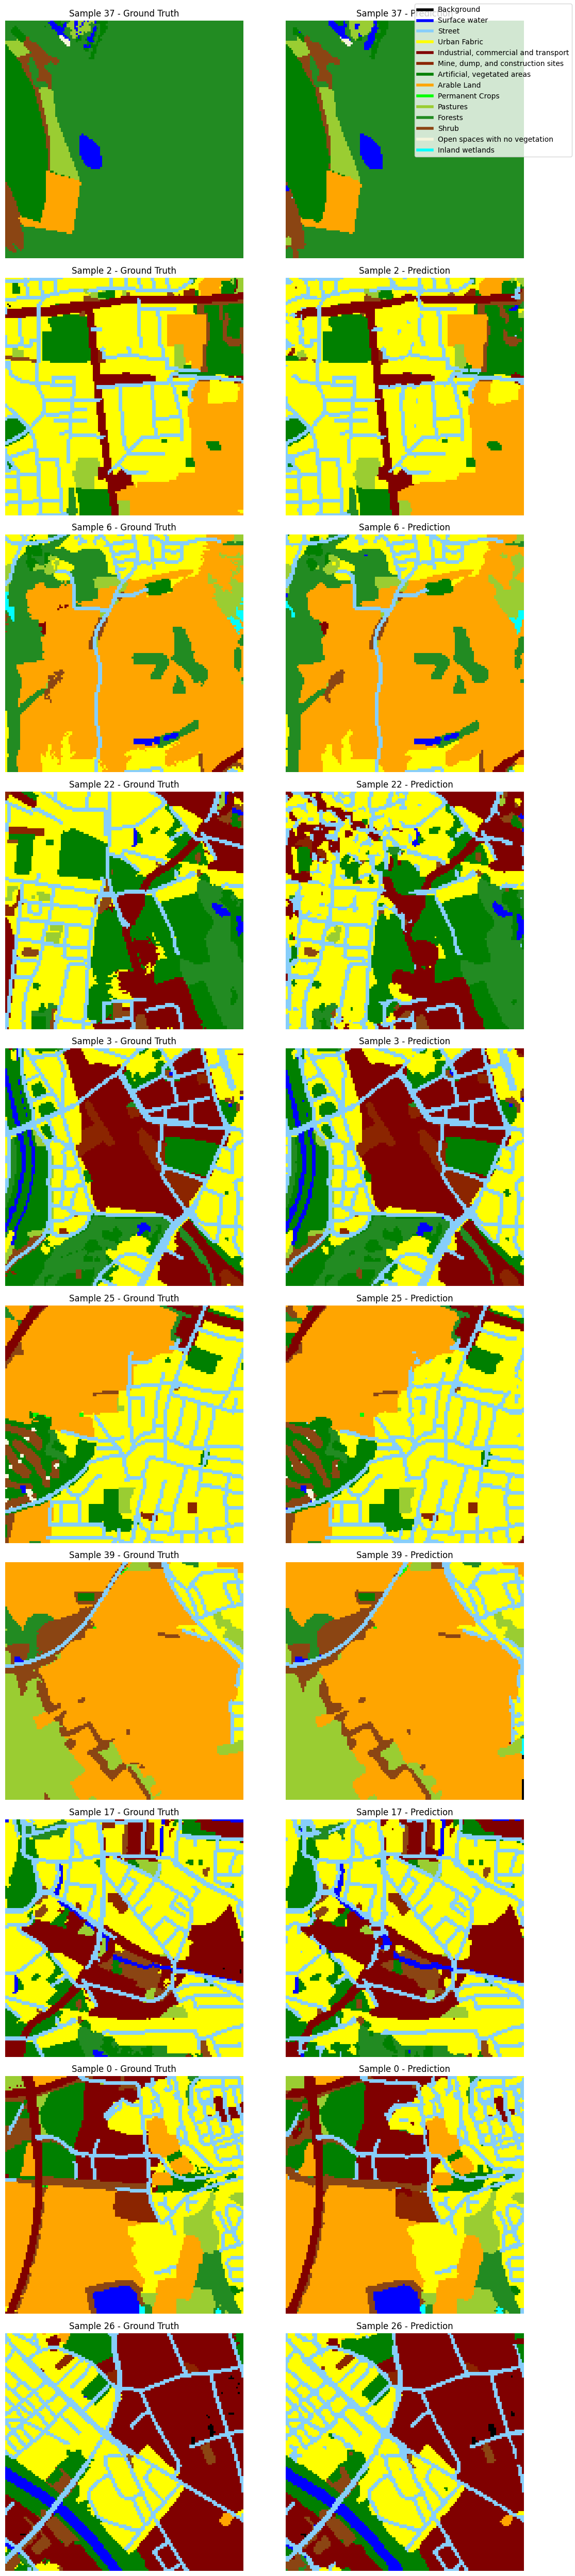

In [50]:
from visualization import visualize_predictions

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

label_map = np.array([
    (0, 0, 0),          # 0 - Background (Black)
    (0, 0, 255),        # 1 - Surface water (Blue)
    (135, 206, 250),    # 2 - Street (Light Sky Blue)
    (255, 255, 0),      # 3 - Urban Fabric (Yellow)
    (128, 0, 0),        # 4 - Industrial, commercial and transport (Maroon)
    (139, 37, 0),       # 5 - Mine, dump, and construction sites (Reddish Brown)
    (0, 128, 0),        # 6 - Artificial, vegetated areas (Green)
    (255, 165, 0),      # 7 - Arable Land (Orange)
    (0, 255, 0),        # 8 - Permanent Crops (Lime Green)
    (154, 205, 50),     # 9 - Pastures (Yellow Green)
    (34, 139, 34),      # 10 - Forests (Forest Green)
    (139, 69, 19),      # 11 - Shrub (Saddle Brown)
    (245, 245, 220),    # 12 - Open spaces with no vegetation (Beige)
    (0, 255, 255),      # 13 - Inland wetlands (Cyan)
])

labels = [
    "Background", "Surface water", "Street", "Urban Fabric", "Industrial, commercial and transport",
    "Mine, dump, and construction sites", "Artificial, vegetated areas", "Arable Land",
    "Permanent Crops", "Pastures", "Forests", "Shrub", "Open spaces with no vegetation", "Inland wetlands"
]

visualize_predictions(model=model_unetPlusPlus, dataset=test_dataset, label_map=label_map, labels=labels, device=device, num_samples=10)

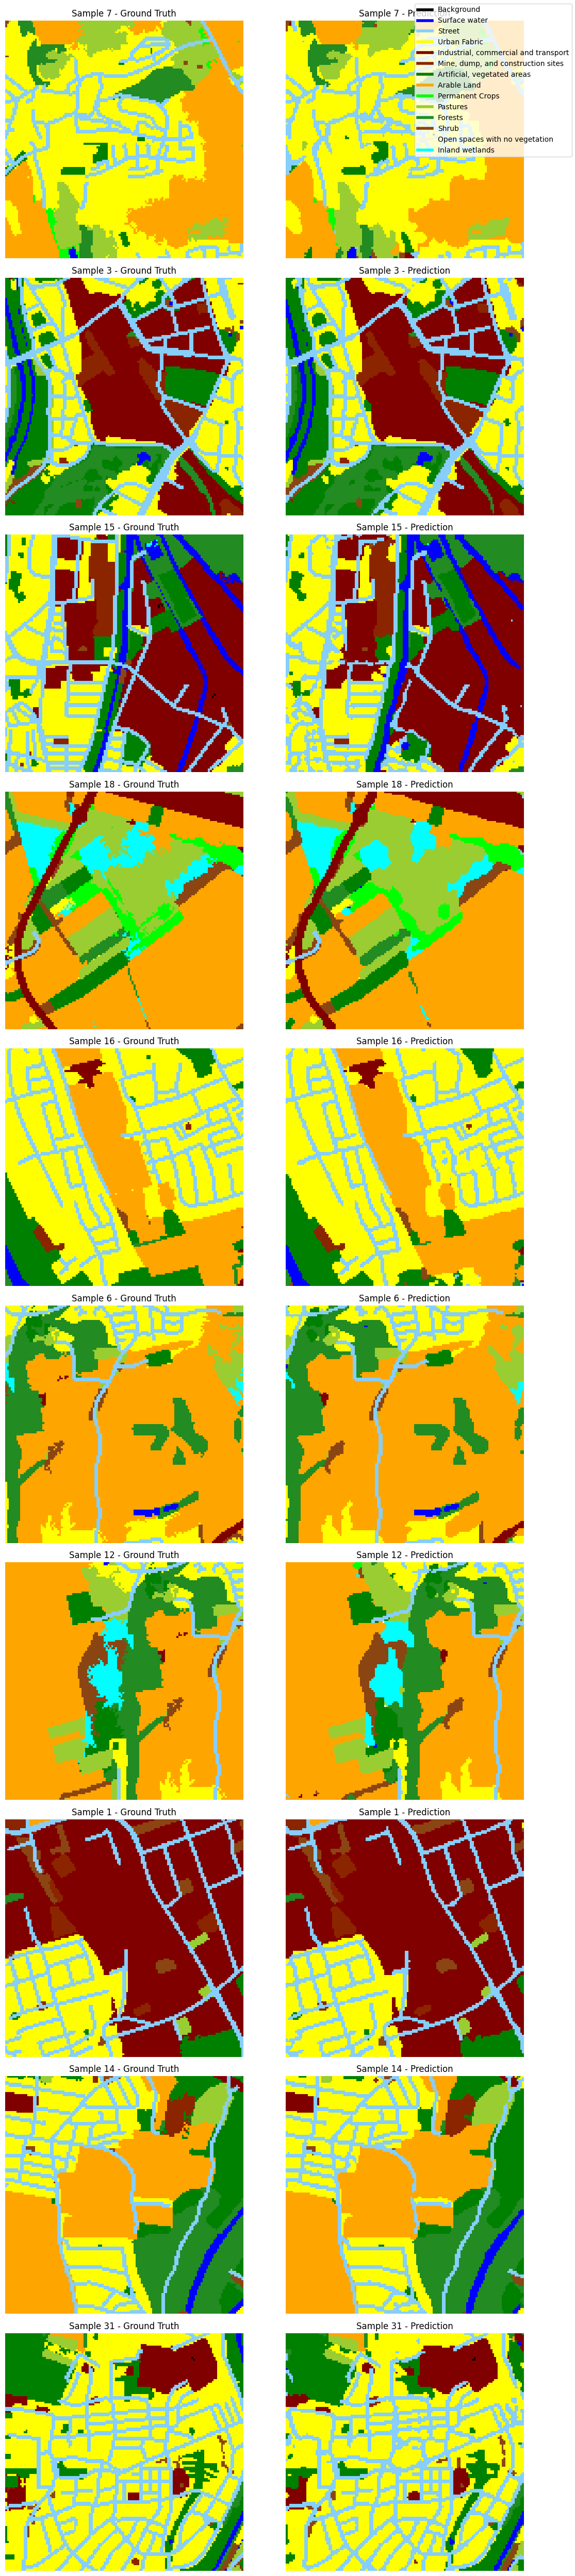

In [51]:
visualize_predictions(model=model_unetPlusPlus, dataset=test_dataset, label_map=label_map, labels=labels, device=device, num_samples=10)